1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

2. Loading Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_data.csv to test_data.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_data.csv to train_data.csv


In [ ]:
loan_train = pd.read_csv('test_data.csv')
loan_test = pd.read_csv('train_data.csv')

print('Train shape:', loan_train.shape)
print('Test shape:', loan_test.shape)
loan_train.head()

Train shape: (367, 12)
Test shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


3. Initial Exploration

In [ ]:
loan_train.info()
loan_train.describe()
loan_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_data.csv to train_data (1).csv


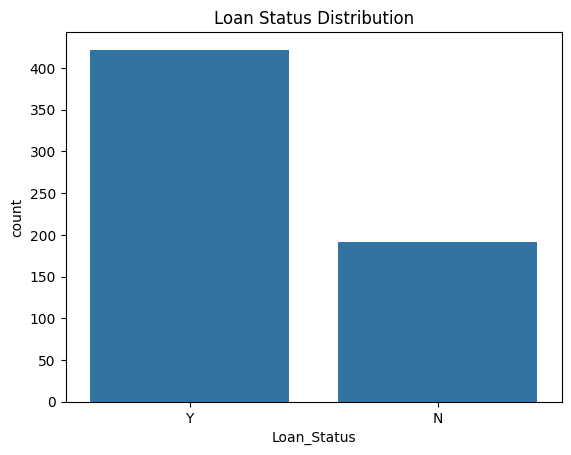

In [ ]:
import seaborn as sns
sns.countplot(data = loan_train, x = 'Loan_Status')
plt.title('Loan Status Distribution')
plt.show()

4. Data Exploration And Cleaning

*Checking for missing values*

In [ ]:
loan_train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


*Visualising missing values*

<Axes: >

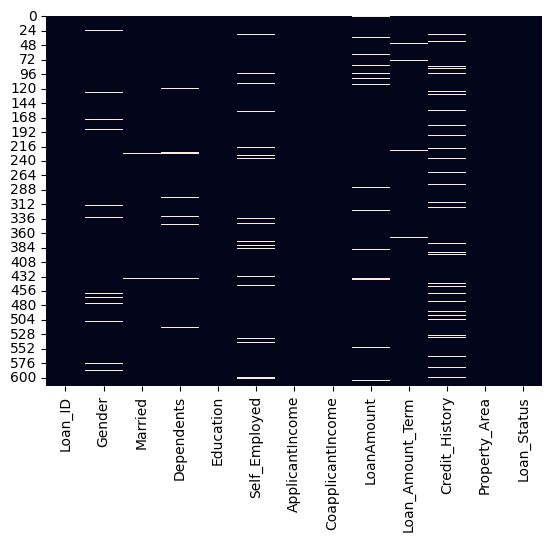

In [ ]:
import seaborn as sns
sns.heatmap(loan_train.isnull(), cbar = False)

*Impute numerical columns with mean or median using SimpleImputer*

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

num_cols = loan_train.select_dtypes(include = np.number).columns
num_imputer = SimpleImputer(strategy = 'median')

loan_train[num_cols] = num_imputer.fit_transform(loan_train[num_cols])

*Impute categorical columns with mode*

In [ ]:
cat_cols = loan_train.select_dtypes(include = 'object').columns.drop('Loan_Status')

cat_imputer = SimpleImputer(strategy = 'most_frequent')
loan_train[cat_cols] = cat_imputer.fit_transform(loan_train[cat_cols])

*Dropping some more columns if it has too many rows*

In [ ]:
loan_train = loan_train.loc[:, loan_train.isnull().mean() < 0.4]

loan_train = loan_train.dropna()

5. Data Visualization And Insights

*Visualising distribution of key numeric features*

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

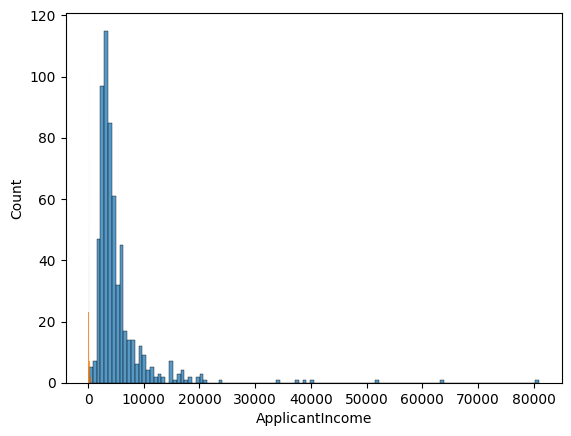

In [ ]:
sns.histplot(loan_train['ApplicantIncome'])
sns.histplot(loan_train['LoanAmount'])

<Axes: xlabel='Education', ylabel='count'>

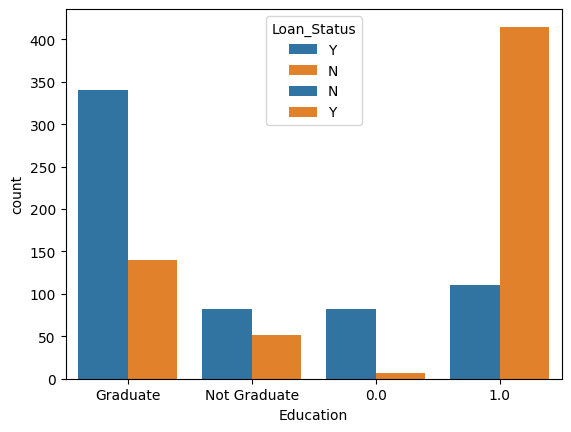

In [ ]:
sns.countplot(data = loan_train, x = 'Education', hue = 'Loan_Status')
sns.countplot(data = loan_train, x = 'Credit_History', hue = 'Loan_Status')

6. Feature Engineering

*Created new features*

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
loan_train['Loan_Status'] = le.fit_transform(loan_train['Loan_Status'])
total_income = loan_train['ApplicantIncome'] + loan_train['CoapplicantIncome']
loan_train['Total_Income'] = total_income

*Boxplot for visual detection of those outliers*

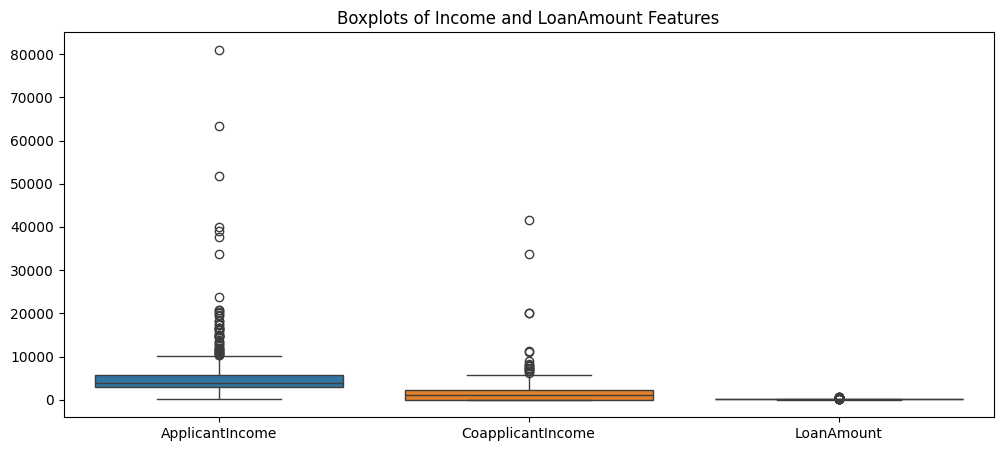

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 5))
sns.boxplot(data = loan_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
plt.title('Boxplots of Income and LoanAmount Features')
plt.show()

*IQR Method*

In [ ]:
def detect_outliers(column):
  Q1 = loan_train[column].quantile(0.25)
  Q3 = loan_train[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return loan_train[(loan_train[column] < lower_bound) | (loan_train[column] > upper_bound)]

outliers_applicant = detect_outliers('ApplicantIncome')
outliers_loan = detect_outliers('LoanAmount')

print(f"Outliers in ApplicantIncome: {len(outliers_applicant)}")
print(f"Outliers in LoanAmount: {len(outliers_loan)}")

Outliers in ApplicantIncome: 50
Outliers in LoanAmount: 41


*Adding Log Feature*

In [ ]:
import numpy as np

loan_train['Log_ApplicantIncome'] = np.log1p(loan_train['ApplicantIncome'])
loan_train['Loh_CoapplicantIncome'] = np.log1p(loan_train['CoapplicantIncome'])
loan_train['Log_LoanAmount'] = np.log1p(loan_train['LoanAmount'])
loan_train['Log_Total_Income'] = np.log1p(loan_train['Total_Income'])

*Adding EMI feature (Equated Monthly Installment)*

In [ ]:
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].median(), inplace = True)

loan_train['EMI'] = loan_train['LoanAmount'] / loan_train['Loan_Amount_Term']

/tmp/ipython-input-35-2458148641.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].median(), inplace = True)


*Adding Loan-to-Income Ratio*

In [ ]:
loan_train['Loan_Income_Ratio'] = loan_train['LoanAmount'] / loan_train['Total_Income']



In [ ]:
import numpy as np

loan_train['Log_Loan_Income_Ratio'] = np.log1p(loan_train['Loan_Income_Ratio'])


7. Categorical Encoding

In [ ]:
loan_train.select_dtypes(include = 'object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')

*Dropping Loan_ID*

In [ ]:
loan_train.drop('Loan_ID', axis = 1, inplace = True)

*Label Encode binary columns*

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed']

for col in binary_cols:
  loan_train[col] = le.fit_transform(loan_train[col])

*One-Hot Encode remaining categorical columns*

In [ ]:
import pandas as pd

loan_train = pd.get_dummies(loan_train, columns = ['Property_Area', 'Dependents'], drop_first = True)

8. Train/Test Split + Modeling Phase (Logistic Regression)

*Split Features (X) and Target (y)*

In [ ]:
y = loan_train['Loan_Status']

X = loan_train.drop('Loan_Status', axis = 1)

*Train-Test Split*

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

*Feature Scaling*

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*Train Logistic Regression Model*

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

*Evaluating the model*

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.7804878048780488

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.76      0.96      0.85        80

    accuracy                           0.78       123
   macro avg       0.81      0.70      0.72       123
weighted avg       0.80      0.78      0.76       123


Confusion Matrix:
 [[19 24]
 [ 3 77]]


9. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train_scaled, y_train)

y_rf_pred = rf_model.predict(X_test_scaled)

print('Random Forest Accuracy:', accuracy_score(y_test, y_rf_pred))
print('\n Random Forest Classification Report:\n', classification_report(y_test, y_rf_pred))
print('\n Random Forest Confusion Matrix:\n', confusion_matrix(y_test, y_rf_pred))

Random Forest Accuracy: 0.8048780487804879

 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.56      0.67        43
           1       0.80      0.94      0.86        80

    accuracy                           0.80       123
   macro avg       0.81      0.75      0.76       123
weighted avg       0.81      0.80      0.79       123


 Random Forest Confusion Matrix:
 [[24 19]
 [ 5 75]]


10. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train_scaled, y_train)

y_dt_pred = dt_model.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_dt_pred))
print('\n Decision Tree Classification Report:\n', classification_report(y_test, y_dt_pred))
print('\n Decision Tree Confusion Matrix:\n', confusion_matrix(y_test, y_dt_pred))

Decision Tree Accuracy: 0.7154471544715447

 Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59        43
           1       0.78      0.79      0.78        80

    accuracy                           0.72       123
   macro avg       0.69      0.68      0.69       123
weighted avg       0.71      0.72      0.71       123


 Decision Tree Confusion Matrix:
 [[25 18]
 [17 63]]


11. XGBoost Classifier

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

xgb_model = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 42)
xgb_model.fit(X_train_scaled, y_train)

y_xgb_pred = xgb_model.predict(X_test_scaled)

print(" XGBoost Accuracy", accuracy_score(y_test, y_pred))
print("\n XGBoost Classification Report:\n", classification_report(y_test, y_xgb_pred))
print("\n XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_xgb_pred))

 XGBoost Accuracy 0.7804878048780488

 XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.56      0.65        43
           1       0.79      0.91      0.85        80

    accuracy                           0.79       123
   macro avg       0.78      0.74      0.75       123
weighted avg       0.79      0.79      0.78       123


 XGBoost Confusion Matrix:
 [[24 19]
 [ 7 73]]


12. Model Comparision: Accuracy, Precision, Recall, F1

In [ ]:
print(results_df.columns)


Index(['Model', 'Accuracy', 'F1 score'], dtype='object')


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_rf_pred),
        accuracy_score(y_test, y_dt_pred),
        accuracy_score(y_test, y_xgb_pred)
    ],
    'F1 score': [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_rf_pred),
        f1_score(y_test, y_dt_pred),
        f1_score(y_test, y_xgb_pred)
    ]
}

results_df = pd.DataFrame(results)
print(results_df.sort_values(by = 'F1 score', ascending = False))

                 Model  Accuracy  F1 score
1        Random Forest  0.804878  0.862069
0  Logistic Regression  0.780488  0.850829
3              XGBoost  0.788618  0.848837
2        Decision Tree  0.715447  0.782609
